In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [3]:
# Get the sarcasm file using wget
import wget

url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json'

wget.download(url, out = 'tmp')

 26% [...................                                                       ] 1499136 / 5643545

 50% [.....................................                                     ] 2834432 / 5643545

 73% [......................................................                    ] 4169728 / 5643545

100% [..........................................................................] 5643545 / 5643545

'tmp/sarcasm.json'

In [4]:
# Import json to read the data
import json

with open('tmp/sarcasm.json') as f:
    data = json.load(f)

In [7]:
# Have a look to our data
print(type(data))
print(len(data))
print(data[:5])

<class 'list'>
26709
[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}, {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'is_sarcastic': 0}, {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697', 'headline': "mom starting to fear son's web series closest thing she will have to grandchild", 'is_sarcastic': 1}, {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302', 'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'is_sarcastic': 1}, {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-

In [8]:
# Extract sentences and labels
sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [18]:
# Check out sentences and labels
print(type(sentences))
print(len(sentences))
print(sentences[113])

print(type(labels))
print(len(labels))
print(labels[113])

<class 'list'>
26709
'is it too late to audition?' asks perfect actor for role, poking head into room just as producers were giving up hope
<class 'list'>
26709
1


In [20]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
# Assign parameters
vocab_size = 10000
embedding_dim = 16
max_len = 100
trunc_type = 'post'
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [23]:
# Train test split
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
train_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [24]:
len(train_sentences)

20000

In [25]:
len(test_sentences)

6709

In [26]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [27]:
# Check the train / test data as well as their labels type before feeding to training
print(type(training_padded))
print(type(train_labels))

print(type(testing_padded))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>


In [28]:
# Conver the label type to np array
import numpy as np

training_labels = np.array(train_labels)
testing_labels = np.array(test_labels)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 4s - loss: 0.6668 - accuracy: 0.5872 - val_loss: 0.5857 - val_accuracy: 0.7302
Epoch 2/30
20000/20000 - 3s - loss: 0.4305 - accuracy: 0.8274 - val_loss: 0.3812 - val_accuracy: 0.8393
Epoch 3/30
20000/20000 - 3s - loss: 0.3073 - accuracy: 0.8773 - val_loss: 0.3694 - val_accuracy: 0.8378
Epoch 4/30
20000/20000 - 3s - loss: 0.2537 - accuracy: 0.9004 - val_loss: 0.3498 - val_accuracy: 0.8486
Epoch 5/30
20000/20000 - 3s - loss: 0.2195 - accuracy: 0.9145 - val_loss: 0.3446 - val_accuracy: 0.8548
Epoch 6/30
20000/20000 - 3s - loss: 0.1923 - accuracy: 0.9264 - val_loss: 0.3594 - val_accuracy: 0.8545
Epoch 7/30
20000/20000 - 3s - loss: 0.1696 - accuracy: 0.9370 - val_loss: 0.3663 - val_accuracy: 0.8539
Epoch 8/30
20000/20000 - 3s - loss: 0.1505 - accuracy: 0.9456 - val_loss: 0.3929 - val_accuracy: 0.8506
Epoch 9/30
20000/20000 - 

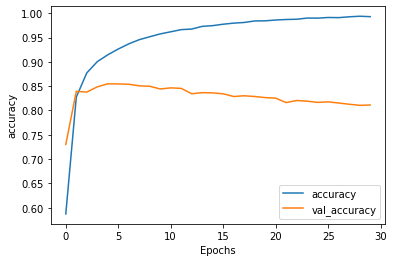

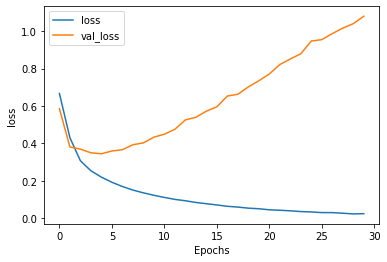

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(train_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [35]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [36]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [37]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [39]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)
print(model.predict(padded))

[[9.2550492e-01]
 [2.2914917e-06]]
